In [125]:
from IPython.display import display, Math, Latex

# Introduction

This tutorial will introduce the famous clustering problem in machine learning and data mining, and a simple but
efficient algorithm, k means, that solve the problem.

### Tutorial Content
* Introuduction of Clustering Problem and K Means
* Algorithm of K Means
* K Means Implementation
* Example of Grouping 100 data points
* Example of Grouping points in n dimensions
* Improvement: K Means ++
* Comparasion of regular K Means and K Means ++
* Applications of K Means
* Further resources

## Clustering

Clustering is the process of partitioning a group of data points into a small number of clusters. A good clustering 
results in a high intra-class(intra-cluster) similarity and a low inter-class similarity. Clustering problem is 
computationally difficult(NP-hard), but there are efficient algorithms that are commonly employed and converge
quickly to a local optimum.

### Why Clustering?
* Organizing data into clusters shows internal structure of the data
* Sometimes partitioning is the goal
* Prepare for other AI techniques
* Discovering in data


## K-means algorithm

K-means is an exclusive clustering algoritm that solves the the clustering problem. K means was developed by J.MacQueen (1967) and then by J.A.Hartigan and M.A.Wong aroung 1975. The procedure follows a simple way to classify a given data set through a certain number of clusters (k clusters). The main idea is to define k cluster centroids, one for each cluster. These centroids could be chosen randomly, but placed as much as possible far away from each other would be more efficient. The next step is to take each point belonging to a given data set and associate it to the nearest centroid. After the first round of grouping is completed, we re-calculate k new centroids as barycenters of the clusters resulting from the previous step. After we have these k new centroids, we regroup all 
data points based on its distance to new centroids. Repeat the above steps until centroids do not move anymore or are almost stable.



### Goal of k-means:
Given a set of observations ($x_1, x_2, ..., x_n$), where each observation is a d-dimensional real vecotr, 
k-means clustering aims to partition the n observations into k less than or equal to n sets 
$S = \{S_1, S_2, ..., S_k\}$ so as to minimize the within-cluster sum of squares.

In other words, it aims to minimize an objective function, in this case a squared error function:

$$J = \sum_{j=1}^{k} \sum_{i=1}^{n} || X_{i}^{(j)} - c_j||^{2}$$
where $||X_{i}^{(j)} - c_j||^{2}$ is a chosen distance measure between a datapoint $x_{i}^{(j)}$ and the cluster center $c_{j}$. And J is an indicator of the distance of the n datapoints from their respective cluster centers.

### Steps of k-means:
1.	Randomly choose k cluster centroids
2.	Assign each data point to the closest cluster centroid 
3.	Compute the mean of the all dots in the same cluster, and move the cluster centroid to the new position
4.	Repeat step 2 and 3, until the cluster centroids do not move / margins are small enough


# Implementation

Given a set of data points, first we create a K Means class to keep track of the data points, the center points we generated, and the cluster assignment for each data point.

### We break down implementation into four parts
* KMeans.rand_centers( )
* KMeans.grouping( )
* KMeans.recalculate( )
* Repeatedly call grouping and recalculate

#### 1. KMeans.rand_centers(  )
In the first iteration, we randomly generate k center points from all data points. Note that in the final state, center points would be spreaded out, so choosing the initial center points so that they are relatively apart from each other instead of uniformly random would make it more efficient. However, for most cases, K means could find reasonable center points after a couple iterations even with randomly choosen initial center points. So in this implementation, we choose initial center points randomly.

#### 2. KMeans.grouping(  )
After we have center points, either from the above generating function or from our calculation in further implementation, we will start to group data points according to their distances to the centers. Euclidean distance is most widely used; other distance measurements, like Manhattan Distance Measure, Squared Euclidean Distance Measure can also be used as criteria for grouping. We use Euclidean Distance in the example.

#### 3. KMeans.recalculate(  )
After we put all data points into groups, we recalculate the center points of each cluster. Note that it is the gist of K means algorithm -- approach the optimal clusters step by step from randomly choosen ones. After recalculating the centriod of each cluster, we get a better representation of each cluster. In the first interation, the change after recalculating can be really big because it is likely that the randomly chosen center point is not at the center of the group.

#### 4. Repeat 2 and 3
After getting a better representation of each cluster, we regroup all data points to its nearest centers. After each interation, the difference before and after recalculating is decreasing. The Algorithm halts after the centers are stable or the margin is small enough.

Now that's take a look at the actual implementation.

In [126]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np

class KMeans(object):
    def __init__(self,k,points):
        # points is a 2d list where the number of sublist is the dimension of datapoints(n), and contains m points
        self.k = k
        self.points = points
        self.n = len(points)
        self.m = len(points[0])
        # number of data points
        self.pre_centers = None
        self.centers = []
        # a list with length k, and each sublist is of length n
        self.groupIdx = []
        # list of indexes of corresponding center of the datapoints
        self.group = []
        # a 3d list with length k
        # each sublist is of length n, containing all points in the cluster 
        self.colors = ["red","cyan","green","blue","yellow","black","magenta"]

    def rand_centers(self):
        result = []
        # a list with length k, and each sublist is of length n
        for i in range(self.k):
            cur_center = []
            temp = np.random.randint(self.m)
            for j in range(self.n):
                cur_center.append(self.points[j][temp])
            self.centers.append(cur_center)
            

    def grouping(self):
        self.group = []
        self.groupIdx = []
        # finding centers for each data points
        for i in range(self.m):
            # loop through all m points
            temp_point = []
            best_center = -1
            # the index of best fitting center
            min_dist = 0
            for j in range(self.n):
                temp_point.append(self.points[j][i])
            for c in range(self.k):
                # compare the distance with k center points
                diff = np.array(temp_point) - np.array(self.centers[c])
                dist = np.linalg.norm(diff)
                if min_dist == 0 or dist <= min_dist:
                    min_dist = dist
                    best_center = c
            self.groupIdx.append(best_center)
        
        # put all points in groups
        for j in range(self.k):
            #looping through all centers
            temp_point = []
            temp_dimen = []
            for i in range(self.m):
                # looping through all points
                if self.groupIdx[i] == j:
                    for c in range(self.n):
                        #add the n coordinates of point into n sublists
                        if len(temp_dimen) < self.n:
                            temp_dimen.append([self.points[c][i]])
                        else:
                            temp_dimen[c].append(self.points[c][i])                            
            self.group.append(temp_dimen)
                        

    def recalculate(self):
        new_centers = []
        for i in range(self.k):
            cluster = self.group[i]
            # a 2d list with length n, where each sublist contains the value in that dimension
            new_center = []
            for j in range(self.n):
                values = cluster[j]
                #values is the list of values in that dimension
                summ = sum(values)
                mean = float(summ)/float(len(values))
                new_center.append(mean)
            new_centers.append(new_center)
        self.pre_centers = self.centers
        self.centers = new_centers
    

    def center_helper(self):
        # put each dimension of the center into a list (make them to singletons)
        result = []
        for center in self.centers:
            sublist = []
            for c in center:
                sublist += [c]
            result.append(sublist)
        return result
    
    def pre_center_helper(self):
        # put each dimension of the center into a list (make them to singletons)
        result = []
        for center in self.pre_centers:
            sublist = []
            for c in center:
                sublist += [c]
            result.append(sublist)
        return result
 

    def plot_2d(self):
        # Assuming the points are 2D
        for i in range(self.k):
            [x,y] = self.group[i]
            plt.scatter(x,y,color=self.colors[i])
        m_centers = self.center_helper()
        if self.pre_centers != None: m_pre_centers = self.pre_center_helper()
        for i in range(self.k):
            center = m_centers[i]   
            [x,y] = center
            plt.scatter(x,y,color=self.colors[i],s=95,marker ="*")
            if self.pre_centers != None:
                pre_center = m_pre_centers[i]
                [x_p,y_p] = pre_center
                plt.scatter(x_p,y_p,color=self.colors[i],s=95,marker =">")
        plt.show()
        
    def plot_3d(self):
        # Assuming the points are 3D
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        for i in range(self.k):
            [x,y,z] = self.group[i]
            plt.scatter(x,y,zs=z,color=self.colors[i])
        m_centers = self.center_helper()
        if self.pre_centers != None: m_pre_centers = self.pre_center_helper()
        for i in range(self.k):
            center = m_centers[i]   
            [x,y,z] = center
            plt.scatter(x,y,zs=z,color=self.colors[i],s=95,marker ="*")
            if self.pre_centers != None:
                pre_center = m_pre_centers[i]
                [x_p,y_p,z_p] = pre_center
                plt.scatter(x_p,y_p,zs=z_p,color=self.colors[i],s=95,marker =">")
        plt.show()
        

Now let's look at an example of how KMeans group 100 randomly generated 2D datapoints into 4 clusters.

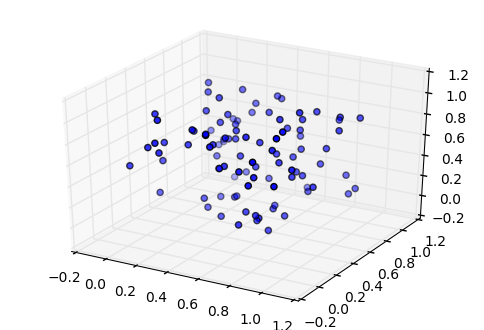

In [127]:
N = 100
a = np.random.rand(N)
b = np.random.rand(N)
c = np.random.rand(N)

a = [ 0.03509916,  0.27122626,  0.40094559,  0.60975553,  0.2216322,   0.90389451,
  0.12955612,  0.39942374,  0.11334164,  0.10496237,  0.77484747,  0.06781501,
  0.19033516,  0.50633191,  0.32319934,  0.38937679,  0.45150624,  0.36172477,
  0.77430602,  0.70128921,  0.09108216,  0.86243408,  0.81205751,  0.47071269,
  0.88190418,  0.97329462,  0.72096861,  0.4582232 ,  0.82270301,  0.7926946,
  0.64056864,  0.07830765,  0.75152951,  0.05748689,  0.53384029,  0.92442622,
  0.27728922,  0.5114176 ,  0.00842348,  0.97177116,  0.63921547,  0.75969197,
  0.75443602,  0.24114106,  0.19336355,  0.57512094,  0.65133892,  0.68178861,
  0.06347012,  0.30749183,  0.7550689,   0.71412177,  0.66956344,  0.58166861,
  0.28550866,  0.16684888,  0.44885227,  0.72910006,  0.12969309,  0.32971449,
  0.43897693,  0.67736987, 0.29644767,  0.03910722 , 0.19583265,  0.60125421,
  0.7904146 ,  0.92859551,  0.80992739,  0.16829836,  0.74746944,  0.7928282,
  0.07270079,  0.15487829,  0.9991014,   0.32211225,  0.42648363,  0.33489347,
  0.66420352,  0.31212821, 0.69325625,  0.64748159 , 0.70095834,  0.24682134,
  0.24138573,  0.80447112,  0.72962579,  0.56246164,  0.69138623,  0.49609335,
  0.49684757,  0.26444102,  0.43026179,  0.90802406,  0.92689582,  0.18029307,
  0.94049326,  0.25017255,  0.84427019,  0.41466659]

b = [ 0.84891579,  0.57875357,  0.53262459,  0.74057226,  0.37554816,  0.80917566,
  0.04183328,  0.28228915,  0.23689935,  0.89538349,  0.27688176,  0.90153803,
  0.67272143,  0.02853465,  0.34585451,  0.22294293,  0.95518707,  0.5921924,
  0.01885201,  0.42380365,  0.75121172,  0.7347891 ,  0.43372328,  0.77878085,
  0.13131945,  0.80520002,  0.64935271,  0.47908595,  0.74297276,  0.65866309,
  0.22449633,  0.23381897,  0.11733556,  0.97460477,  0.6702621 ,  0.76233821,
  0.65877499,  0.21235661,  0.04070439,  0.91940238,  0.56680937,  0.26721921,
  0.61533835,  0.87869143,  0.05258181,  0.49179256,  0.91127089,  0.07274646,
  0.22891551,  0.9140049 ,  0.81310812,  0.71416837,  0.54663574,  0.32792354,
  0.90914164,  0.94696615,  0.27931254,  0.43513568,  0.96259566,  0.18105679,
  0.44690941,  0.76622126,  0.61906165,  0.86280193,  0.01057735,  0.90977491,
  0.39586454,  0.02581804,  0.97890411,  0.08617396,  0.18178914,  0.59045119,
  0.28171259,  0.93150548,  0.83641475,  0.30897889,  0.3693564 ,  0.75683459,
  0.10908522,  0.50713772,  0.25630643,  0.53770804,  0.74811989,  0.59821815,
  0.62001113,  0.01278007,  0.17759346,  0.46937776,  0.66311154,  0.08739184,
  0.18471643,  0.75870621,  0.94516571,  0.2580905 ,  0.85831707,  0.57902346,
  0.44306461,  0.26612984,  0.26652991,  0.51130195]

c = [ 0.95857028,  0.76585658,  0.74404811,  0.72585384,  0.76638104 , 0.87811522,
  0.7470077,   0.73139274,  0.69508703,  0.40349317,  0.78668629 , 0.33686401,
  0.37319325,  0.97309282,  0.07310553,  0.85634522 , 0.86617475 , 0.62663758,
  0.58719278,  0.13258166,  0.92778114,  0.60453686 , 0.46793814 , 0.82103556,
  0.99702897,  0.16090549,  0.38146789,  0.5445811  , 0.44100174,  0.20645684,
  0.18904503,  0.2036381 ,  0.60596587 , 0.32937586 , 0.2523508 ,  0.77854585,
  0.57093561,  0.59454889,  0.5407206  , 0.83724211 , 0.57246324,  0.02205815,
  0.97062448,  0.93244133,  0.70883324,  0.69970808 , 0.07303331,  0.15766992,
  0.95372867,  0.8017101 ,  0.88782375,  0.56730924 , 0.9160409  , 0.83105565,
  0.70996229,  0.57862005,  0.05769817,  0.57957234 , 0.5804811  , 0.9003487,
  0.1556708 ,  0.71458259,  0.82864811,  0.48941871,  0.82181465 , 0.5666626,
  0.1046586 ,  0.62231339,  0.74593535,  0.99064215,  0.1842412  , 0.39577137,
  0.4875594 ,  0.02195917,  0.20487854,  0.18071204,  0.7600682 ,  0.21370187,
  0.63895731,  0.09122939,  0.10397837,  0.088794 ,   0.82971167,  0.30222752,
  0.97168895,  0.81724836,  0.20557209,  0.47504286,  0.51059691,  0.8333254,
  0.58337636,  0.66015464,  0.88981644,  0.65126978,  0.30346219,  0.85148726,
  0.40412731,  0.69784114,  0.98212413,  0.12450309]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.scatter(a,b,zs=c)
plt.show()



In [128]:
example = KMeans(4,[a,b])
example.rand_centers()

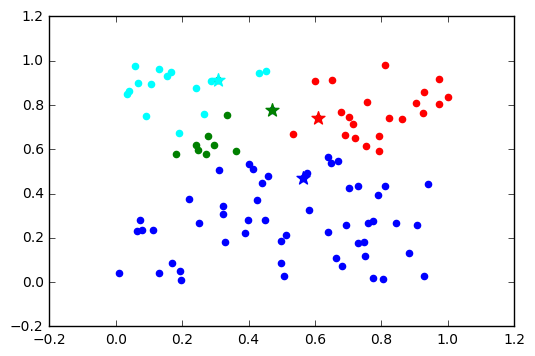

In [129]:
example.grouping()
example.plot_2d()

Now we have grouped the 100 data points into four groups. Stars represent the cluster centroid of each
cluster, and points in the same group are represented in the same color. 

Let's calculate the new centriods of each cluster now.

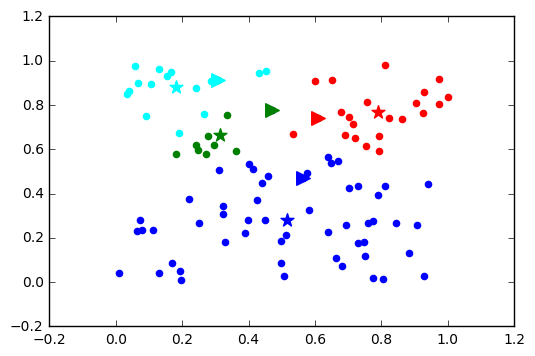

In [130]:
example.recalculate()
example.plot_2d()

After recalculation, the new centriods are marked as stars while the original ones are marked as triangles. It is very likely that the original centriods are far from the centers of the clusters, and that makes them poor centers. Recalculation moves centriods to the centers of groups.

Now we repeatedly call grouping and recalculation functions to improve cluster assignments.

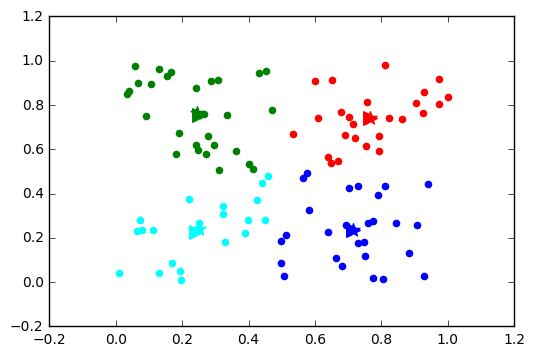

In [136]:
example.grouping()
example.recalculate()

example.grouping()
example.recalculate()

example.grouping()
example.recalculate()

example.grouping()
example.recalculate()
example.plot_2d()

After the fifth iteration, centriods are relatively stable, and cluster distribution looks more reasonable. As data points were generated uniformly at random, and when divided into four clusters, it should be the case that there is one cluster at each corner. Even though we started with a poor partition model when generating centroids at random in the first iteration, K means is able to adjust the model through repeatedly grouping and recalculating centroids.

We can also use K means on N-dimensional data points. We show an example of partitioning 3D data points into 5 clusters.

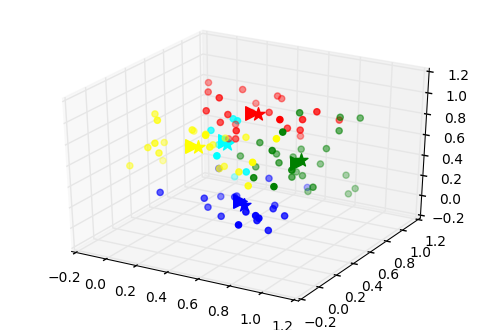

In [132]:
example_3d = KMeans(5,[a,b,c])
example_3d.rand_centers()
example_3d.grouping()
example_3d.recalculate()
example_3d.grouping()
example_3d.recalculate()
example_3d.grouping()
example_3d.recalculate()
example_3d.plot_3d()

### Even Better: K Means ++
As we mentioned above, choosing the initial centroids uniformly at random is not efficient. Besides, different choices of initial centroids may produce different outcomes. That means, a badly chosen initial centroids may produce unsatisfying clustering. In other words, K means may be trapped in the local optimum. 

To resolve this issue, we use K-means ++, which is guaranteed to find a solution that is O(log k) competitive to the optimal k-means solution.

#### Steps of K Means ++
1. Choose one center uniformly at random from among the data points.
2. For each data point x, compute D(x), the distance between x and the nearest center that has already been chosen.
3. Choose one new data point at random as a new center, using a weighted probability distribution where a point x is chosen with probability proportional to $D(x)^2$.
4. Repeat Steps 2 and 3 until k centers have been chosen.
5. Now that the initial centers have been chosen, proceed using standard k-means clustering.


### Implementation

In [133]:
class KMeansPlus(KMeans):
    
    def Plus_centers(self):
        result = []
        # a list with length k, and each sublist is of length n
        for i in range(self.k):
            cur_center = []
            if i==0:
                temp = np.random.randint(self.m)
                for j in range(self.n):
                    cur_center.append(self.points[j][temp])
                result.append(cur_center)
            else:
                # calculate the new weight of each point
                prob_list = []
                for i in range(self.m):
                    # loop through all m points
                    temp_point = []
                    min_dist = 0
                    for j in range(self.n):
                        temp_point.append(self.points[j][i])
                    for center in result:
                        # compare the distance with existing center points
                        diff = np.array(temp_point) - result
                        dist = (np.linalg.norm(diff))**2
                        if min_dist == 0 or dist <= min_dist:
                            min_dist = dist
                    prob_list.append(min_dist)
                summ = sum(prob_list)
                # normalize the probabilty of each point
                prob_list_norm = []
                for c in prob_list:
                    prob_list_norm.append(float(c)/float(summ))
                Idx = np.random.choice(self.m, 1, p=prob_list_norm)
                for j in range(self.n):
                    cur_center.append(self.points[j][Idx])
                result.append(cur_center)    
        self.centers = result        
                  

Now let's look at the difference between randomly generated centriods and the improved ones produced by K Means ++.
In the below example, the first scatter plot is produced by K means ++ while the second one is by regular K Means. 
From the contrast we can see that by increasing the distance between centroids, K Means ++ is able to generate much better centriods than regular K Means. 

/Applications/Utilities/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:36: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


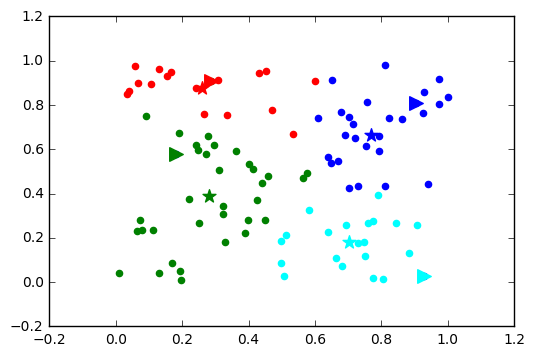

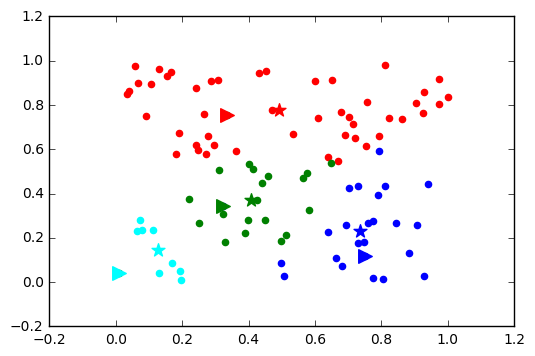

In [134]:
example_plus = KMeansPlus(4,[a,b])
example_plus.Plus_centers()
example_plus.grouping()
example_plus.recalculate()
example_plus.plot_2d()

example = KMeans(4,[a,b])
example.rand_centers()
example.grouping()
example.recalculate()
example.plot_2d()


### Application of K Means

k-means clustering is rather easy to implement and apply even on large data sets. So it has been successfully used in various topics, including market segmentation, computer vision, geostatistics, astronomy and agriculture. It often is used as a preprocessing step for other algorithms.In general, K means can be applied when classifying a set of objects based on their attributes.

### Summary and References
This tutorial outlined the key ideas of K means algorithm. Further resources and video tutorials can be found below:

* K Means Introduction by Edureka! : https://www.youtube.com/watch?v=ZwbXy2GUoV8
* K Means Tutorial by Dr. Kardi Teknomo: http://people.revoledu.com/kardi/tutorial/kMean/index.html
* K Means Algorithm by *Data Cluster Algorithms*: https://sites.google.com/site/dataclusteringalgorithms/k-means-clustering-algorithm


